In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Partition as p

# %matplotlib widget

In [2]:
# this allows figures to be saved as svg files with the text preserved
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
color = {'03b': (0,0,0.56), '04b': 'b', '09g1': 'r', '09g2': 'y', '09g3': 'orange'}
## load published whole rock

SN = pd.read_excel('PubData/CompiledWR.xlsx', sheet_name = 'Sierra Negra')
CA = pd.read_excel('PubData/CompiledWR.xlsx', sheet_name = 'Cerro Azul')

Flo = pd.read_excel('PubData/CompiledWR.xlsx', 
                   sheet_name = 'Floreana')

## load in new pyroxene trace
PxTrace = pd.read_excel('Data/CpxTraceData.xlsx', sheet_name = "Cpx_data")

## load in old pyroxene data
FloTrace = pd.read_excel('PubData/PyroxeneFlo.xlsx')

In [4]:
Dict=['La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy' ,'Ho', 'Er', 'Tm' ,'Yb' ,'Lu' ,'Y']
Rj=np.array([1.16, 1.143, 1.126, 1.109, 1.079, 1.066, 1.053, 1.04, 1.027, 1.015, 1.004, 0.994, 0.985, 0.977, 1.019])

norm = {'Rb': 0.635, 'Sr': 21.1, 'Y': 4.55, 'Ba': 6.989, 'Nb': 0.713, 'La': 0.487, 'Ce': 1.775, 'Pr': 0.276, 
        'Nd': 1.354, 'Sm': 0.444, 'Eu': 0.168, 'Gd': 0.596, 'Tb': 0.108, 'Dy': 0.737, 'Ho': 0.164,
        'Er': 0.48, 'Yb': 0.493, 'Lu': 0.074}

D = p.CpxD(PxTrace, Rj, 1100, Dict)
DFlo = p.CpxD(FloTrace, Rj, 1100, Dict)
PxTraceMelt = PxTrace.copy()

for d in Dict:
    PxTrace['Melt ' + d] = PxTrace[d]/D[d]
    FloTrace['Melt ' + d] = FloTrace[d]/DFlo[d]
    PxTraceMelt[d] = PxTrace[d]/D[d]

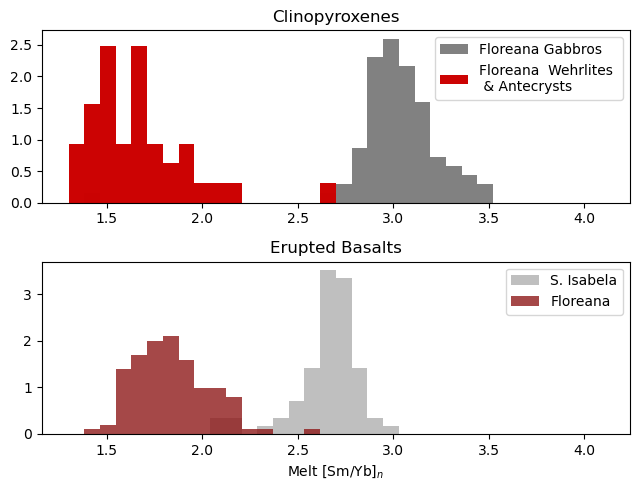

In [5]:
## comparison of cpx compositions to erupted melts
f, a = plt.subplots(2,1, figsize = (6.5, 5))
a[0].hist((PxTrace['Melt Sm']/norm['Sm'])/
          (PxTrace['Melt Yb']/norm['Yb']), bins = np.linspace(1.3, 4.1, 35), 
          facecolor = [0.5, 0.5, 0.5], alpha = 0.99, density = True,label = 'Floreana Gabbros')
a[0].hist((FloTrace['Melt Sm'][FloTrace['Affinity'] == 'FLO']/norm['Sm'])/
          (FloTrace['Melt Yb'][FloTrace['Affinity'] == 'FLO']/norm['Yb']), 
          bins = np.linspace(1.3, 4.1, 35),
          facecolor = [0.8, 0, 0], alpha = 0.99, density = True, label = 'Floreana  Wehrlites \n & Antecrysts')

a[1].hist((np.append(CA['Sm'].values, SN['Sm'].values)/norm['Sm'])/
       (np.append(CA['Yb'].values, SN['Yb'].values)/norm['Yb']), 
       bins = np.linspace(1.3, 4.1, 35), facecolor = [0.5,0.5,0.5], alpha = 0.5, density = True, label = 'S. Isabela')
a[1].hist((Flo['Sm']/norm['Sm'])/(Flo['Yb']/norm['Yb']), bins = np.linspace(1.3, 4.1, 35), 
       facecolor = [0.56, 0.1, 0.1], alpha = 0.8, density = True, label = 'Floreana')

a[1].set_xlabel('Melt [Sm/Yb]$_n$')

a[0].legend()
a[1].legend()
a[0].set_title("Clinopyroxenes")
a[1].set_title("Erupted Basalts")

f.tight_layout()

